In [2]:
import numpy as np
import matplotlib.pyplot as plt
import dill
import corner 
import pandas as pd

In [3]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='times')
plt.rcParams["figure.figsize"] = (12,6)
from matplotlib import rc
rc('text', usetex=True)

In [4]:
#hmc = dill.load(open('../kep51/dt1.0_nw500_ns1500_c4_mcmc.pkl', 'rb')).get_samples()
hmc = dill.load(open('../kep51/dmm_dt1.0_nw500_ns1500_c4_mcmc.pkl', 'rb')).get_samples()

In [5]:
hmc['ec'] = np.sqrt(hmc['ecc']) * np.cos(hmc['omega'])
hmc['es'] = np.sqrt(hmc['ecc']) * np.sin(hmc['omega'])

In [6]:
hmcsmp = np.r_[[[hmc['mass'][:,i], hmc['period'][:,i], hmc['ec'][:,i], hmc['es'][:,i], hmc['tic'][:,i]] for i in range(3)]].reshape(15, -1).T

In [12]:
np.shape(hmcsmp)

(6000, 15)

In [19]:
emc = pd.read_csv("kep51.tsv", comment='#', delimiter='|')

In [32]:
labels = np.array([['$m_%d/M_\star$'%i, '$P_%d$'%i, '$\sqrt{e}_%d\cos\omega_%d$'%(i,i), '$\sqrt{e}_%d\sin\omega_%d$'%(i,i), '$T_%d$'%i] for i in range(1,4)]).ravel()

In [33]:
np.shape(emc), len(emc)

((5100, 15), 5100)

In [34]:
import matplotlib.lines as mlines
names = ["Libby-Roberts et al. (2020)\n  TTVFast + emcee", "This Work\n  jnkepler + NUTS sampler in NumPyro"]
ndim = np.shape(emc)[1]

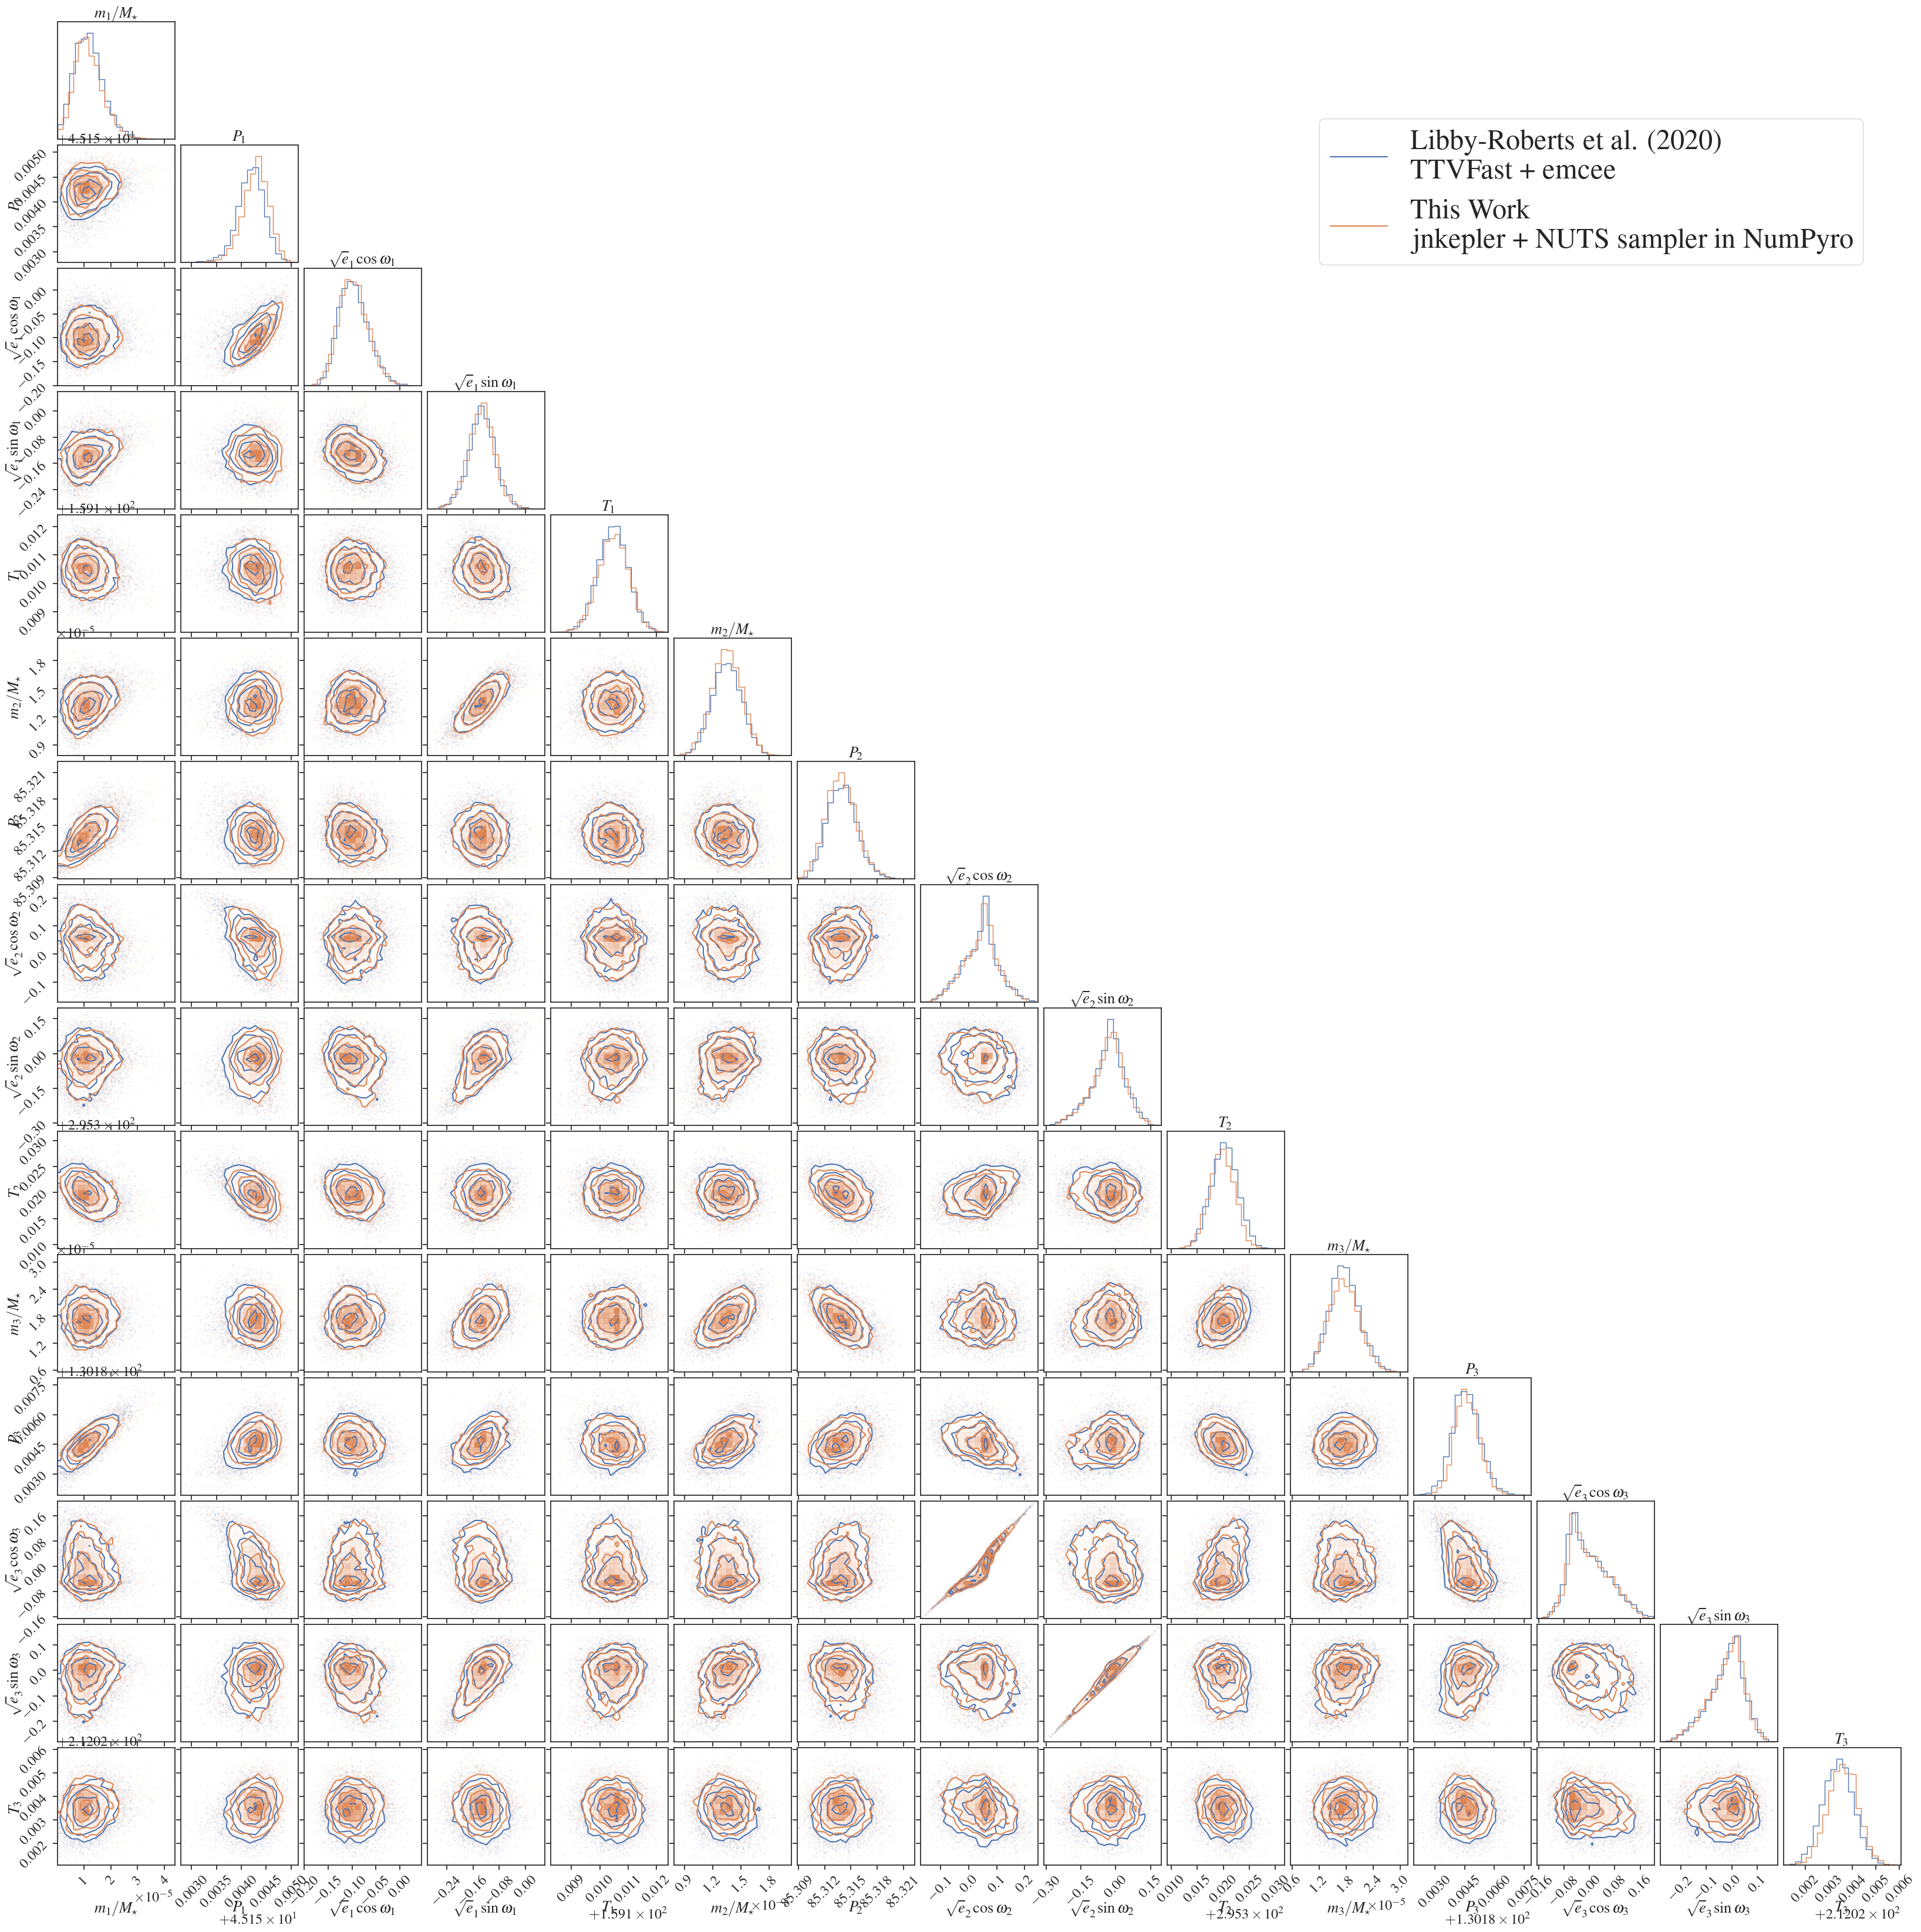

In [35]:
fig_ = corner.corner(emc, labels=labels, show_titles=True, bins=20, color='C0', title_fmt=None)
fig = corner.corner(hmcsmp[:len(emc)], fig=fig_, color='C1', bins=20)
handles = []
for i, name in enumerate(names):
    handles.append(mlines.Line2D([], [], color='C%d'%i, label=name))
plt.legend(handles=handles, bbox_to_anchor=(0.8, ndim), fontsize=35)
plt.savefig("corner_3planet.png", dpi=200, bbox_inches="tight")